In [1]:
import pandas as pd
import numpy as np
import os

file_path = r"C:\Users\simonk03\Downloads\Mid Project\Final\Provision2024.xlsx"  
if os.path.exists(file_path):  # Check if the file exists
    excel_data = pd.ExcelFile(file_path)  
    actual_potential = excel_data.parse("Actual&Potential")  
    loss_tree = excel_data.parse("Loss Tree")  
    print("File loaded successfully!") 
else:
    print(f"File not found at {file_path}. Please check the path and try again.")  #if file is not found|
    
    
    import os

csv_file_path = r'C:\Users\simonk03\OneDrive - Heineken International\Data siense\Master Data sciense\PowerBI Projects\Mid project\Finaalsss\Mid project Scrapping\cleaned_scrapping_provision_from_modified1.csv'

os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

actual_potential.to_csv(csv_file_path, index=False)
print(f"Data successfully saved to {csv_file_path}")

File loaded successfully!
Data successfully saved to C:\Users\simonk03\OneDrive - Heineken International\Data siense\Master Data sciense\PowerBI Projects\Mid project\Finaalsss\Mid project Scrapping\cleaned_scrapping_provision_from_modified1.csv


In [2]:
actual_potential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Segment           10 non-null     object 
 1   Plant             1203 non-null   object 
 2   Product           1182 non-null   object 
 3   Quantity          918 non-null    object 
 4   Risk Level        1193 non-null   object 
 5   Segement          1193 non-null   object 
 6   Code              1190 non-null   object 
 7   UOM               1193 non-null   object 
 8   Status            1193 non-null   object 
 9   Classification    1193 non-null   object 
 10  Level 1           1187 non-null   object 
 11  Level 2           1187 non-null   object 
 12  Level 3           1187 non-null   object 
 13  Scrapping Status  1193 non-null   object 
 14  Scrapping Month   1193 non-null   float64
 15  Value in EGP      1192 non-null   float64
 16  Date              10 non-null     object 


In [3]:
loss_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Level 1                                    26 non-null     object 
 1   Product_Damaged                            10 non-null     object 
 2   Product_Expired                            8 non-null      object 
 3   Product_Not_Meeting_with_Specs_to_Be_Sold  8 non-null      object 
 4   Missing_Product                            9 non-null      object 
 5   Cancelled_NPI                              5 non-null      object 
 6   Quality_Issue                              10 non-null     object 
 7   Delisted_SKU                               15 non-null     object 
 8   Postponed_NPI                              7 non-null      object 
 9   Unnamed: 9                                 1 non-null      object 
 10  Unnamed: 10                 

In [4]:
# Step 1: Handle Missing Values in "Actual&Potential"
actual_potential['Product'].fillna('Unknown', inplace=True) 
actual_potential['Risk Level'].fillna('Unknown', inplace=True)
actual_potential['Quantity'] = pd.to_numeric(actual_potential['Quantity'], errors='coerce') 
actual_potential['Quantity'].fillna(actual_potential['Quantity'].mean(), inplace=True)
print("Step 1: Missing values handled in 'Actual&Potential'.") 


Step 1: Missing values handled in 'Actual&Potential'.


In [5]:
# Step 2: Handle Missing Values in "Loss Tree"

if 'Category' in loss_tree.columns:
# Convert 'Category' to string type and fill missing values with 'Unknown'
    loss_tree['Category'] = loss_tree['Category'].astype(str)
    loss_tree['Category'].fillna('Unknown', inplace=True)
else:

    print("'Category' column not found in 'Loss Tree'.")

# Check if the 'Sub-Category' column exists in the DataFrame
if 'Sub-Category' in loss_tree.columns:
    loss_tree['Sub-Category'] = loss_tree['Sub-Category'].astype(str)
    loss_tree['Sub-Category'].fillna('Unknown', inplace=True)
else:
    print("'Sub-Category' column not found in 'Loss Tree'.")
#the completion of missing value handling
print("Missing values handled in 'Loss Tree'.")


'Sub-Category' column not found in 'Loss Tree'.
Missing values handled in 'Loss Tree'.


In [6]:
# Step 2: Handle Duplicates in "Actual&Potential"

actual_potential.drop_duplicates(subset=['Product', 'Risk Level', 'Quantity'], keep='first', inplace=True)
print("Duplicates removed in 'Actual&Potential'.")


Duplicates removed in 'Actual&Potential'.


In [7]:
# Step 3: Handle Inconsistent Data Types in "Actual&Potential"
# Convert 'Quantity' column to numeric, invalid values will be set as NaN
actual_potential['Quantity'] = pd.to_numeric(actual_potential['Quantity'], errors='coerce')
# Convert 'Product' to string type 
actual_potential['Product'] = actual_potential['Product'].astype(str)
print("Data types fixed in 'Actual&Potential'.")


Data types fixed in 'Actual&Potential'.


In [8]:
# Step 4: Handle Misplaced Rows/Irrelevant Data in "Actual&Potential"
actual_potential = actual_potential[actual_potential['Segment'] != '---']
actual_potential = actual_potential[actual_potential['Plant'] != '###']
print("Misplaced rows removed in 'Actual&Potential'.")

Misplaced rows removed in 'Actual&Potential'.


In [9]:
# Step 5: Handle Outliers in "Actual&Potential"
# Replace extreme values (above 1000) with NaN and then fill with the column mean
actual_potential['Quantity'] = actual_potential['Quantity'].apply(lambda x: x if x < 1000 else np.nan)
actual_potential['Quantity'].fillna(actual_potential['Quantity'].mean(), inplace=True)
print("Outliers handled in 'Actual&Potential'.")

Outliers handled in 'Actual&Potential'.


In [10]:
# Step 6: Handle Incorrect Date Formats in "Actual&Potential"
# Convert 'Date' column to datetime, replacing invalid formats with NaT
actual_potential['Date'] = pd.to_datetime(actual_potential['Date'], errors='coerce')
# Fill missing date values with a default date
actual_potential['Date'].fillna('2024-01-01', inplace=True)
print("Date formats corrected in 'Actual&Potential'.")

Date formats corrected in 'Actual&Potential'.


In [11]:
# Step 7: Handle Invalid Column Headers in "Actual&Potential"
# Remove duplicated column names
actual_potential = actual_potential.loc[:, ~actual_potential.columns.duplicated()]
print("Invalid column headers resolved in 'Actual&Potential'.")


Invalid column headers resolved in 'Actual&Potential'.


In [12]:
# Step 8: Handle Loss Tree Specific Errors
# Handle Missing Values in "Loss Tree"
loss_tree['Category'] = loss_tree.get('Category', pd.Series('Unknown', index=loss_tree.index)).fillna('Unknown')
loss_tree['Sub-Category'] = loss_tree.get('Sub-Category', pd.Series('Unknown', index=loss_tree.index)).fillna('Unknown')
print("Missing values handled in 'Loss Tree'.")


Missing values handled in 'Loss Tree'.


In [13]:
# Step 9: Save the cleaned data to a new Excel file
output_path = r'C:\Users\simonk03\Documents\cleaned_scrapping_provision_from_modified1.xlsx'  # Changed path
try:
    with pd.ExcelWriter(output_path) as writer:
        actual_potential.to_excel(writer, index=False, sheet_name="Actual&Potential")
        loss_tree.to_excel(writer, index=False, sheet_name="Loss Tree")
    print(f"Data cleaned and saved to '{output_path}'.")
except Exception as e:
    print(f"Error saving the file: {e}")


Data cleaned and saved to 'C:\Users\simonk03\Documents\cleaned_scrapping_provision_from_modified1.xlsx'.


In [14]:
# Convert 'Scrapping Month' to numeric, remove out-of-bounds values, and convert to datetime
actual_potential['Scrapping Month'] = pd.to_datetime(
    pd.to_numeric(actual_potential['Scrapping Month'], errors='coerce').clip(lower=1), 
    origin='unix', unit='D', errors='coerce').dt.strftime('%B %Y')

print("Scrapping Month format changed to 'Month Year'.")


Scrapping Month format changed to 'Month Year'.


In [15]:
# Step 9: Save the cleaned data to a new Excel file
output_path = r'C:\Users\simonk03\Documents\cleaned_scrapping_provision_from_modified1.xlsx'  # Changed path
try:
    with pd.ExcelWriter(output_path) as writer:
        actual_potential.to_excel(writer, index=False, sheet_name="Actual&Potential")
        loss_tree.to_excel(writer, index=False, sheet_name="Loss Tree")
    print(f"Data cleaned and saved to '{output_path}'.")
except Exception as e:
    print(f"Error saving the file: {e}")


Data cleaned and saved to 'C:\Users\simonk03\Documents\cleaned_scrapping_provision_from_modified1.xlsx'.


In [16]:
# Save the data as a CSV file
csv_file_path = r'C:\Users\simonk03\Downloads\Final Project 26 June\cleaned_scrapping_provision_from_modified1.csv'
actual_potential.to_csv(csv_file_path, index=False)

print(f"✅ Data successfully saved to: {csv_file_path}")


✅ Data successfully saved to: C:\Users\simonk03\Downloads\Final Project 26 June\cleaned_scrapping_provision_from_modified1.csv


# Scrap Analysis & Cleaning Process
Initial Steps from Excel to Clean CSV

In [17]:
import os
import pandas as pd

# Define the destination CSV path
csv_file_path = r'C:\Users\simonk03\Downloads\Final Project 26 June\cleaned_scrapping_provision_from_modified1.csv'

# Ensure the folder exists
os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

# Save the DataFrame
actual_potential.to_csv(csv_file_path, index=False)

print(f"✅ Data successfully saved to: {csv_file_path}")


✅ Data successfully saved to: C:\Users\simonk03\Downloads\Final Project 26 June\cleaned_scrapping_provision_from_modified1.csv


# Scrap Analysis & Machine Learning Pipeline

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ✅ Correct path (only one valid absolute path, no nesting)
file_path = r'C:\Users\simonk03\Downloads\Final Project 26 June\26 June last\cleaned_scrapping_provision_from_modified1.csv'

# Load the cleaned dataset
data = pd.read_csv(file_path)
data.head()


,Segment,Plant,Product,Quantity,Risk Level,Segement,Code,UOM,Status,Classification,Level 1,Level 2,Level 3,Scrapping Status,Scrapping Month,Value in EGP,Date
0,NaN,EGB4,Unknown,150.000000,High,WIP,NaN,Tons,Booked,Quality Issue,Write_off_Production,Production_own_products,PRODUCTION.Microbiology (quality of beer) inc...,Done,January 2092,2892066.00,2024-01-01
1,NaN,EGB3,Unknown,34.203375,Low,Pack,40026146,PC,Booked,Scarab,Write_off_Sales,Sales,Material no longer used,Pending,December 2092,2864798.53,2024-01-01
2,NaN,EGB4,Unknown,34.203375,High,WIP,WCC,HL,Booked,White Concentrate,Write_off_Expired_date,Expired_date_Sales_Marketing_Supply_Chain,MARKETING/SALES/SCH.Expired date regular SKU,Pending,June 2092,2700000.00,2024-01-01
3,NaN,EGB3,Unknown,34.203375,High,Raw,30008428,Kg,Booked,Fayrouz Coffee,Write_off_Expired_date,Expired_date_Sales_Marketing_Supply_Chain,MARKETING/SALES/SCH.Expired date NPI,Pending,December 2092,968832.00,2024-01-01
4,NaN,EGB1,Unknown,34.203375,Medium,Pack,40030339,Pc,Booked,SKU simplification,Write_off_Sales,Sales,Material no longer used,Pending,December 2092,925804.44,2024-01-01


## Univariate Analysis

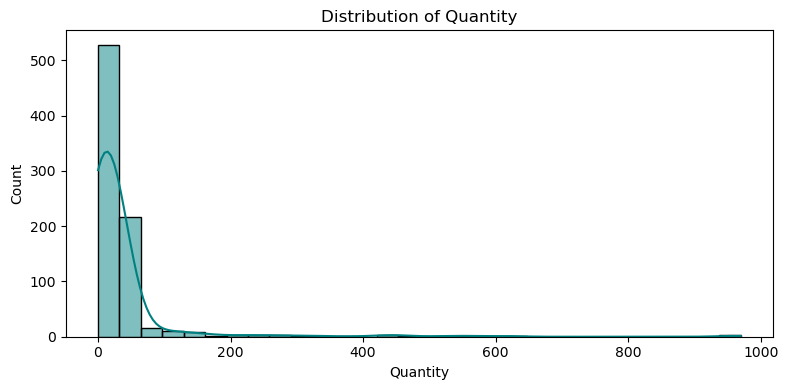

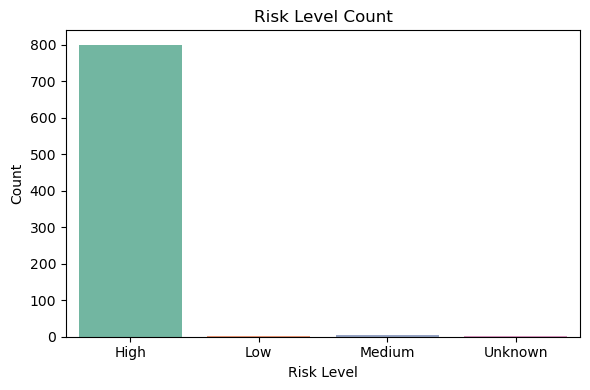

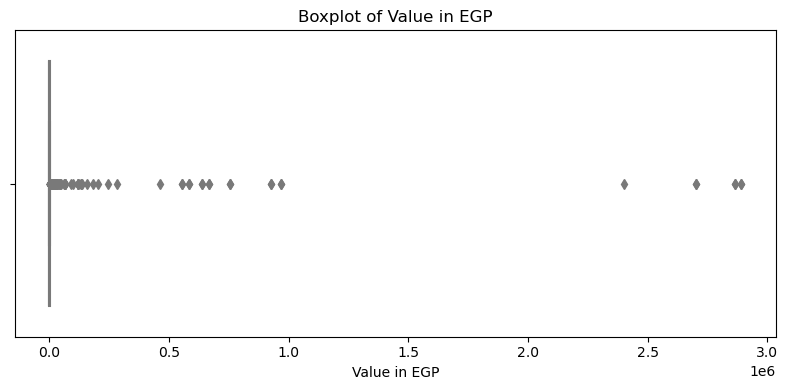

In [19]:

plt.figure(figsize=(8, 4))
sns.histplot(data['Quantity'], kde=True, bins=30, color='teal')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Risk Level', palette='Set2')
plt.title('Risk Level Count')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Value in EGP', data=data, color='lightblue')
plt.title('Boxplot of Value in EGP')
plt.tight_layout()
plt.show()


## Bivariate Analysis

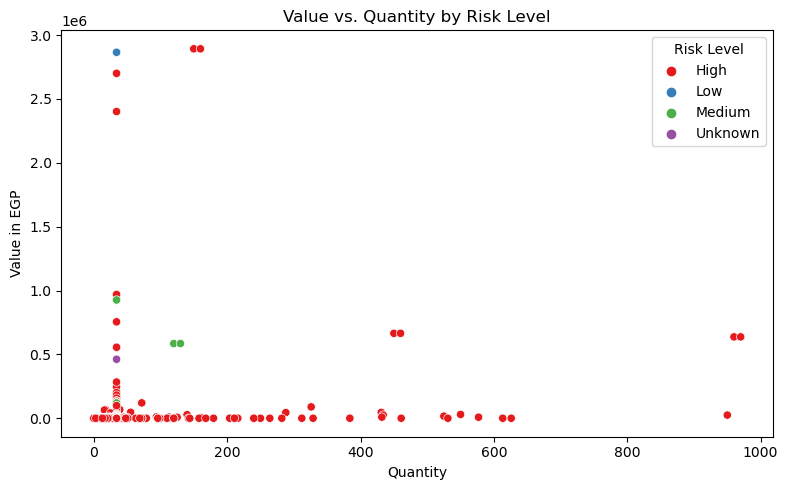

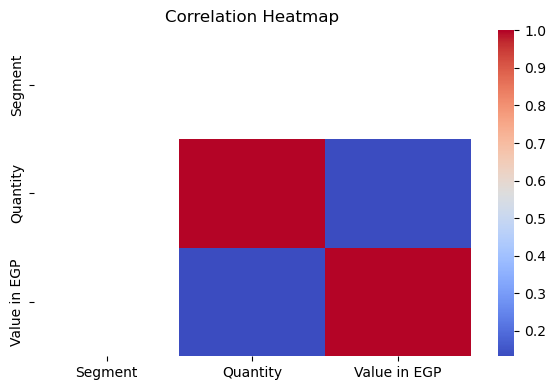

In [20]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Quantity', y='Value in EGP', hue='Risk Level', palette='Set1')
plt.title('Value vs. Quantity by Risk Level')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


## Data Preparation

In [21]:

# One-hot encode relevant categorical columns including Product
categorical_features = ['Plant', 'Segement', 'Classification', 'Product']
data_encoded = pd.get_dummies(data[categorical_features], drop_first=True)

numeric_columns = ['Value in EGP'] if 'Value in EGP' in data.columns else []

# Combine encoded categorical and numeric features
features = pd.concat([data_encoded, data[numeric_columns]], axis=1)
target = data['Risk Level']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## Modeling & Evaluation

In [22]:

# One-hot encode relevant categorical columns including Product
categorical_features = ['Plant', 'Segement', 'Classification', 'Product']
data_encoded = pd.get_dummies(data[categorical_features], drop_first=True)

numeric_columns = ['Value in EGP'] if 'Value in EGP' in data.columns else []

# Combine encoded categorical and numeric features
features = pd.concat([data_encoded, data[numeric_columns]], axis=1)

# Define the target variable
target = data['Risk Level']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## Feature Importance

In [23]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Encode target variable
target_encoded = data['Risk Level'].astype('category')
y = target_encoded.cat.codes

# Encode features
categorical_features = ['Plant', 'Segement', 'Classification', 'Product']
data_encoded = pd.get_dummies(data[categorical_features], drop_first=True)

# Add numeric features (if available)
if 'Value in EGP' in data.columns:
    data_encoded['Value in EGP'] = data['Value in EGP']

# Drop rows with NaNs
X_clean = data_encoded.dropna()
y_clean = y[X_clean.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("✅ Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


✅ Random Forest Results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       161
           3       0.00      0.00      0.00         1

    accuracy                           0.99       162
   macro avg       0.50      0.50      0.50       162
weighted avg       0.99      0.99      0.99       162

Random Forest Accuracy: 0.99


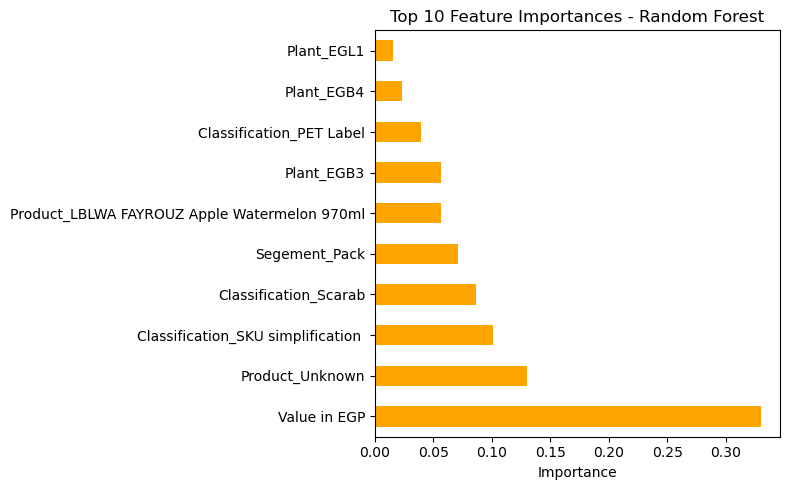

In [24]:

importances = rf.feature_importances_
feat_names = features.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh', color='orange')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


## Second Model: Logistic Regression

In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Evaluation
print("✅ Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")


✅ Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       161
           3       0.00      0.00      0.00         1

    accuracy                           0.99       162
   macro avg       0.50      0.50      0.50       162
weighted avg       0.99      0.99      0.99       162

Logistic Regression Accuracy: 0.99
